In [1]:
from mne import Epochs, find_events, set_eeg_reference
from time import time, strftime, gmtime
from collections import OrderedDict
from glob import glob
import os
from collections import OrderedDict
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import read_montage
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'app','utils','jupyter'))
import utils
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
files = ['/home/dano/BrainWaves Workspaces/Dano Test/Data/Dano/EEG/Dano-1-raw.csv']
replace_ch_names = None
raw = utils.load_data(files, replace_ch_names)

['/home/dano/BrainWaves Workspaces/Dano Test/Data/Dano/EEG/Dano-1-raw.csv']
The following EEG sensors did not have a position specified in the selected montage: ['AUX']. Their position has been left untouched.
Creating RawArray with float64 data, n_channels=6, n_times=32304
    Range : 0 ... 32303 =      0.000 ...   126.184 secs
Ready.


/home/dano/BrainWaves/app/utils/jupyter/utils.py:67: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['AUX']. Their position has been left untouched.
  sfreq=sfreq, montage=montage)


In [5]:
## Filtering Data

# Input
low_cutoff = 1
high_cutoff = 30

# Computation
raw.filter(low_cutoff, high_cutoff, method='iir');

Setting up band-pass filter from 1 - 30 Hz


In [7]:
## Epoch Data

# Input
event_id = {'House': 1, 'Face': 2}
tmin=-0.1
tmax=0.8
baseline = (tmin, tmax)
picks = None
reject = None

# Computation
events = find_events(raw)
# TODO: Figure out how to normalize and auto-reject Emotiv EEG data
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=tmin, tmax=tmax, baseline=baseline, reject=reject, preload=True, 
                verbose=False, picks=picks)

# Output
{"totalEpochs": len(epochs.events), "dropPercentage": (1 - len(epochs.events)/len(events)) * 100, **{x: len(epochs[x]) for x in event_id}}

100 events found
Event IDs: [1 2]


{'Face': 56, 'House': 44, 'dropPercentage': 0.0, 'totalEpochs': 100}

/home/dano/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/dano/BrainWaves/app/utils/jupyter/utils.py:122: RuntimeWarning: Mean of empty slice
  diff = (np.nanmean(X[y == diff_waveform[1], ch_ind], axis=0) -
/home/dano/BrainWaves/app/utils/jupyter/utils.py:123: RuntimeWarning: Mean of empty slice
  np.nanmean(X[y == diff_waveform[0], ch_ind], axis=0))


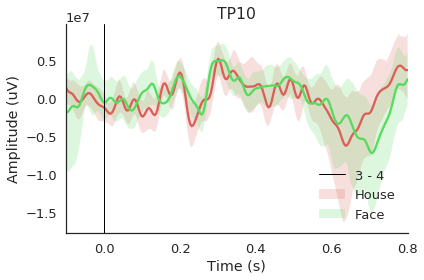

In [18]:
## Plot ERPs

# Input
ch_ind = 3

# Computation
conditions = OrderedDict({key: [value] for (key, value) in event_id.items()})

# Output
X, y = utils.plot_conditions(epochs, ch_ind=ch_ind, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',)